In [2]:
#r "../Evolution/obj/Debug/net6.0/Evolution.dll"
#r "../Evolution/bin/Debug/net6.0/SixLabors.ImageSharp.dll"
#r "../Evolution/bin/Debug/net6.0/SixLabors.ImageSharp.Drawing.dll"
#r "../Evolution/bin/Debug/net6.0/SixLabors.Fonts.dll"


In [3]:
using Evolution;

In [4]:
using SixLabors.ImageSharp.Formats.Png;
using Microsoft.DotNet.Interactive.Formatting;
using SixLabors.ImageSharp;
using SixLabors.ImageSharp.Processing;
using SixLabors.ImageSharp.PixelFormats;
using SixLabors.ImageSharp.Drawing;
using SixLabors.ImageSharp.Drawing.Processing;

void d(Image<Rgba32> image)
{
    string encoded = ImageExtensions.ToBase64String(image, PngFormat.Instance);
    // see https://stackoverflow.com/questions/70841912/how-to-draw-images-in-a-net-interactive-notebook-c-vs-code
    display(PocketViewTags.img[src: encoded]);
}


In [5]:
var world = new TwoDWorld();
var eco = new Ecosystem(world) {
  NumberOfConnections = 5,
  NumberOfInternalNeurons = 1,
  InitialOrganisms = 1000,
  EpochSteps = 1000,
  RecordStepImages = false,
};
eco.Init();

void Status() {
  d(world.Draw());
  display(eco.OutputHistogramSummary());
}

double time() {
  return DateTimeOffset.Now.ToUnixTimeSeconds();
}

void Run(int steps = 1) {
  double start = time();
  for (int i=0; i<steps; i++) {
    eco.ExecuteStep();
  }
  double span = time() - start;
  if (span > 5) {
    Console.WriteLine($"Ran {steps} steps in {span:F1} seconds");
  }
}


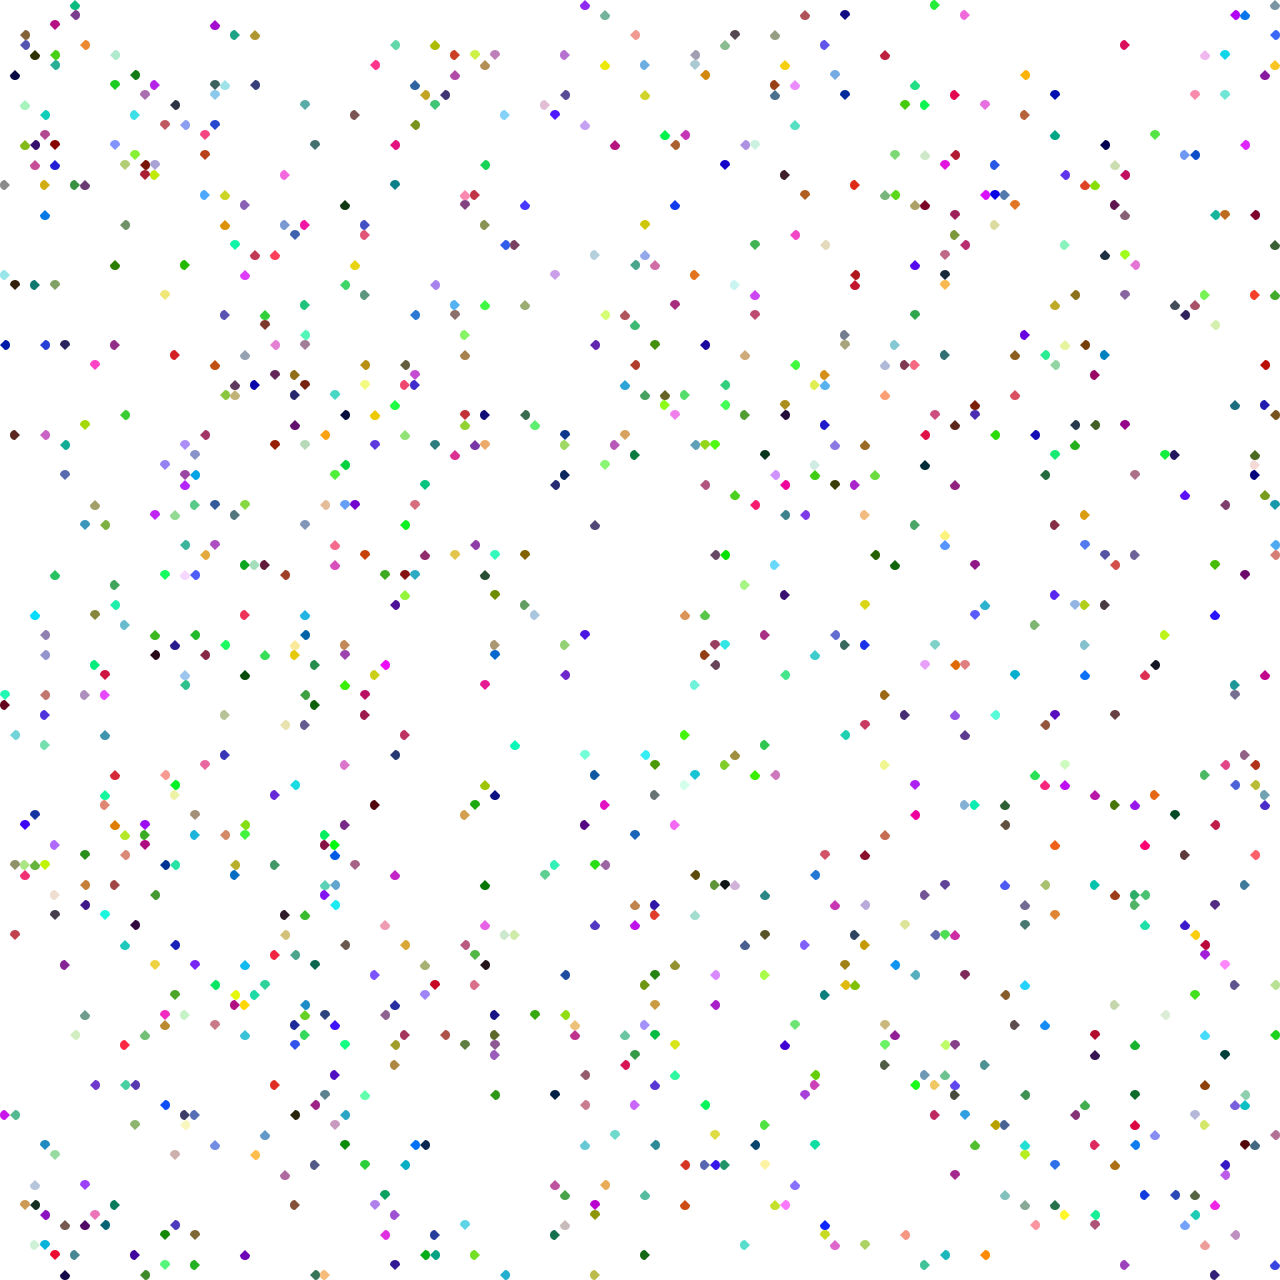

In [6]:
Status();

In [7]:
void RunEpoch() {
  Run(eco.EpochSteps);
  int count = eco.Creatures.Count;
  eco.Cull(s => (s as TwoDCreatureState).loc.x > 64);
  int after = eco.Creatures.Count;
  Console.WriteLine($"Start {count}->{after}, {(int)(after*100/count)}%");
  Status();
}
void Reproduce() {
  eco.ReproducePopulation(0.95);
  eco.AddRandomCreatures();
}
void ShowCreature(Creature c) {
  var graph = c.Genes.NeuralNet.GraphvizVisualization();
  Console.WriteLine(graph);
  string url = Graphviz.CreateGraph(graph);
  display(PocketViewTags.img[src: url]);
}

In [8]:
ShowCreature(eco.Creatures[0])

digraph {
      node [fontname=helvetica]
      edge [fontname=helvetica]
    
  { Yin [tooltip="-1=top, +1=bottom, 0=center"] } -> { MoveB [color=green] [penwidth=0.990] [tooltip="Move Back (binary)"] }[color=red] [penwidth=5.508] [headlabel="   -1.9   "] [arrowhead=empty]
  { BlockL [tooltip="1 if Left blocked, else 0"] } -> { MoveLoR [color=green] [penwidth=0.990] [tooltip="Move Left or Right, whichever is unoccupied; if value>0 prefer Right"] }[color=blue] [penwidth=7.405] [headlabel="   3.4   "] [arrowhead=empty]
  { Osc  } -> { N1 [color=green] [penwidth=0.990]  }[color=blue] [penwidth=3.508] [headlabel="   0.8   "] [arrowhead=empty]
  { RND  } -> { N1 [color=green] [penwidth=0.990]  }[color=red] [penwidth=4.065] [headlabel="   -1.0   "] [arrowhead=empty]
  { RND  } -> { MoveF [color=green] [penwidth=0.990] [tooltip="Move Forward (binary)"] }[color=red] [penwidth=1.517] [headlabel="   -0.1   "] [arrowhead=empty]
}


Start 1000->517, 51%



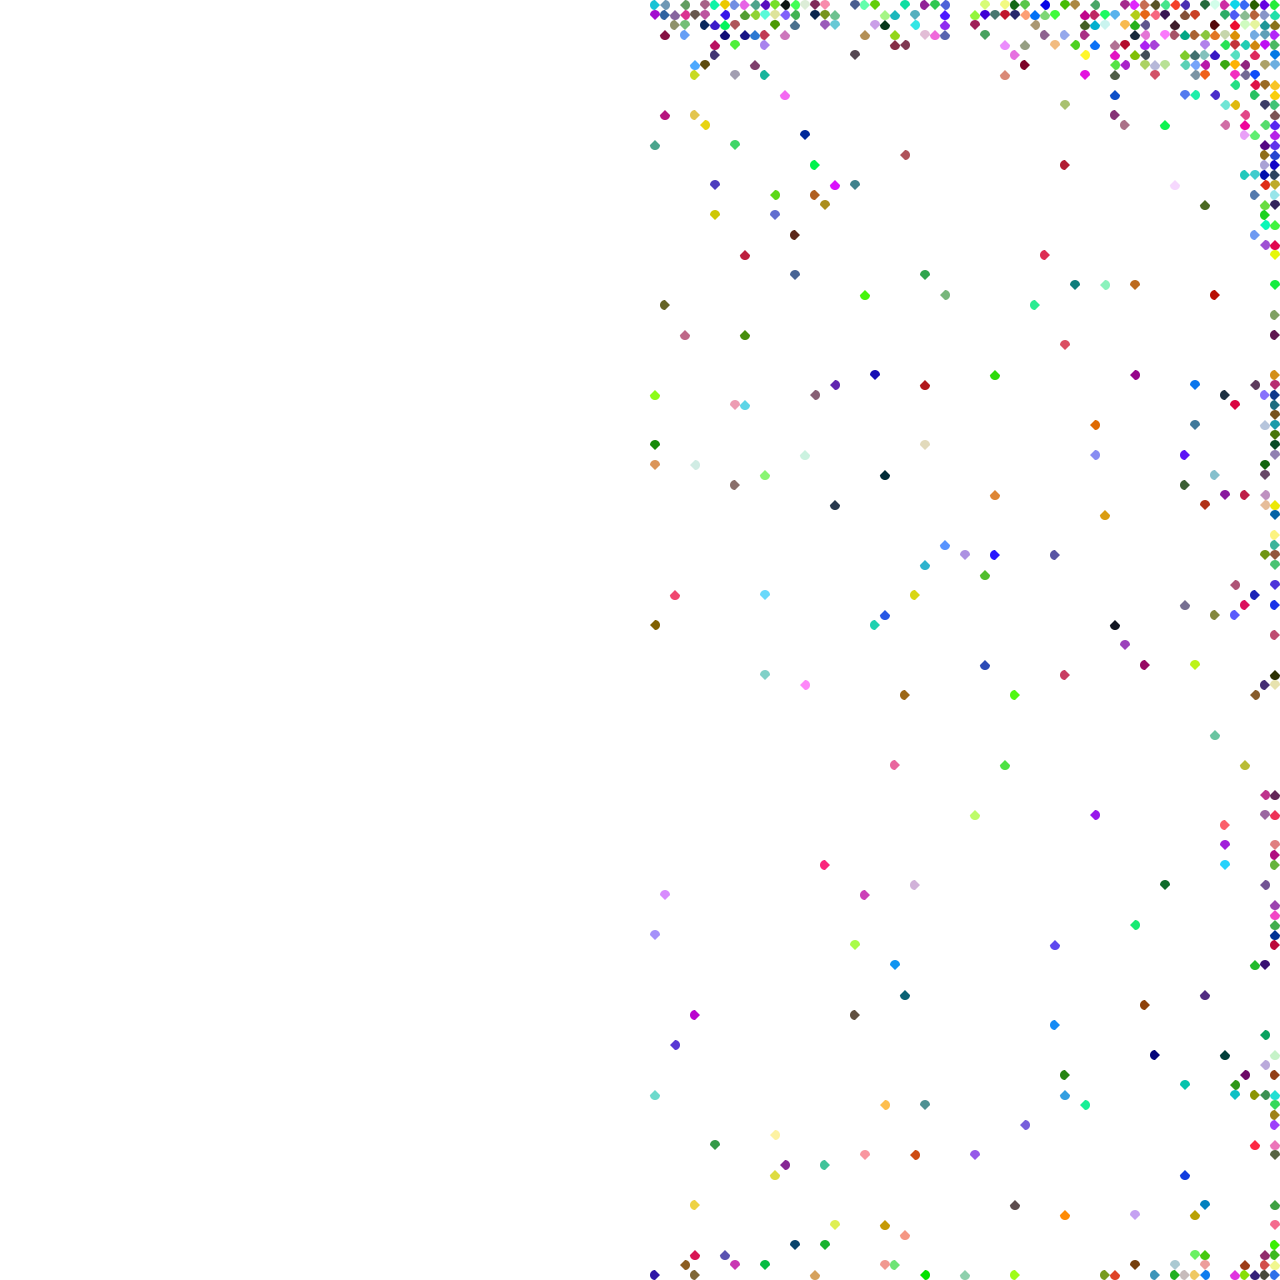

Evolution.MoveRandom     : 178217
Evolution.MoveForward    : 152341
Evolution.MoveLeftOrRight: 143552
Evolution.MoveBack       : 119875
Evolution.NoPossible     : 111149
Evolution.MoveLeftRight  : 110908
Evolution.MoveNorthSouth :  85471
Evolution.MoveEastWest   :  67966
Evolution.NullOutput     :  30521

In [9]:
RunEpoch();

Start 1000->817, 81%



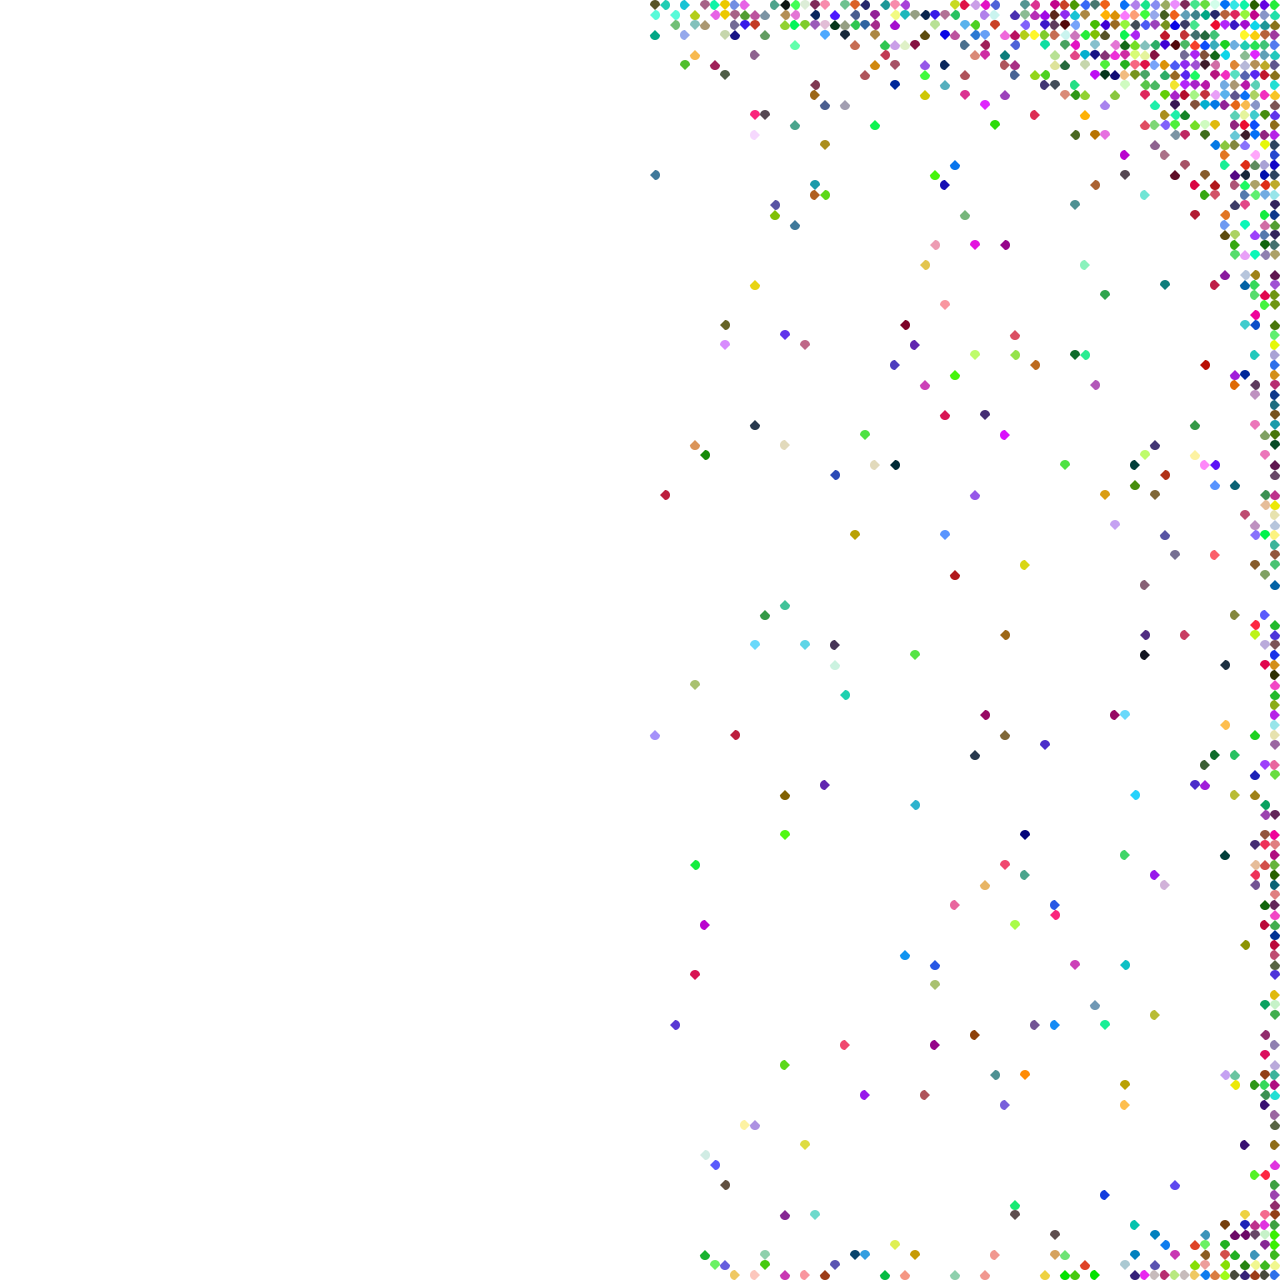

Evolution.MoveRandom     : 369402
Evolution.NoPossible     : 301876
Evolution.MoveForward    : 286341
Evolution.MoveLeftOrRight: 257993
Evolution.MoveBack       : 225353
Evolution.MoveLeftRight  : 210215
Evolution.MoveNorthSouth : 159938
Evolution.MoveEastWest   : 129301
Evolution.NullOutput     :  59581

In [10]:
Reproduce();
RunEpoch();

Start 1000->909, 90%



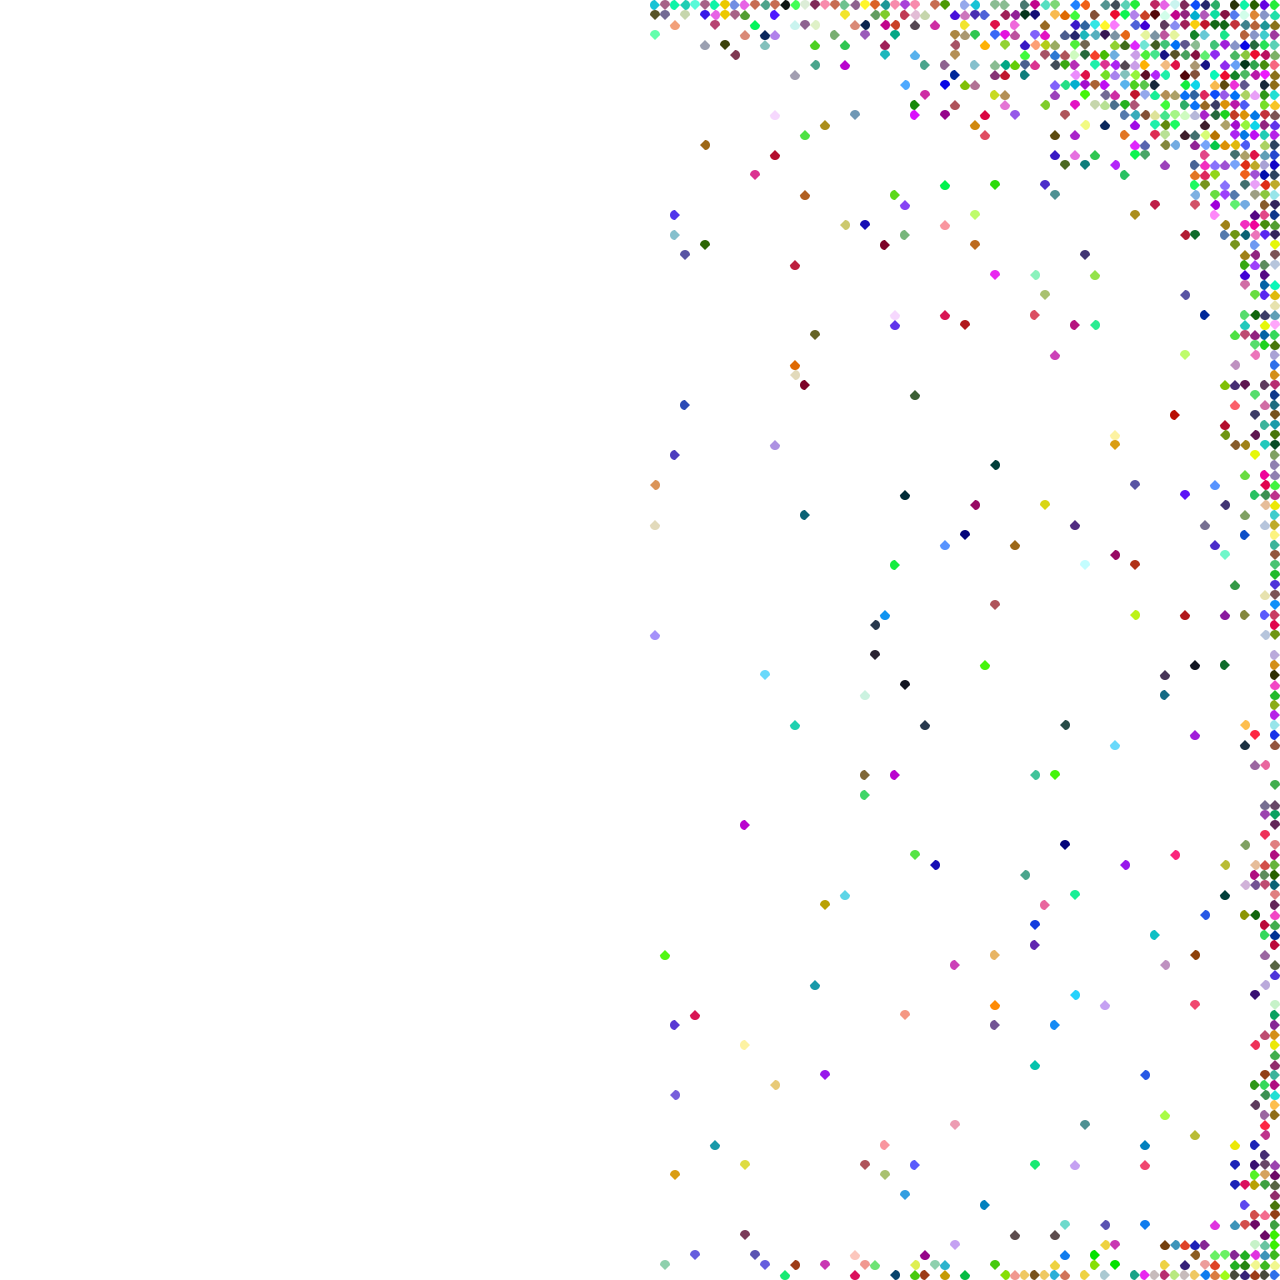

Evolution.NoPossible     : 565944
Evolution.MoveRandom     : 557612
Evolution.MoveForward    : 403191
Evolution.MoveLeftOrRight: 360672
Evolution.MoveBack       : 314594
Evolution.MoveLeftRight  : 299600
Evolution.MoveNorthSouth : 223045
Evolution.MoveEastWest   : 183628
Evolution.NullOutput     :  91714

In [11]:
Reproduce();
RunEpoch();

Start 1000->933, 93%



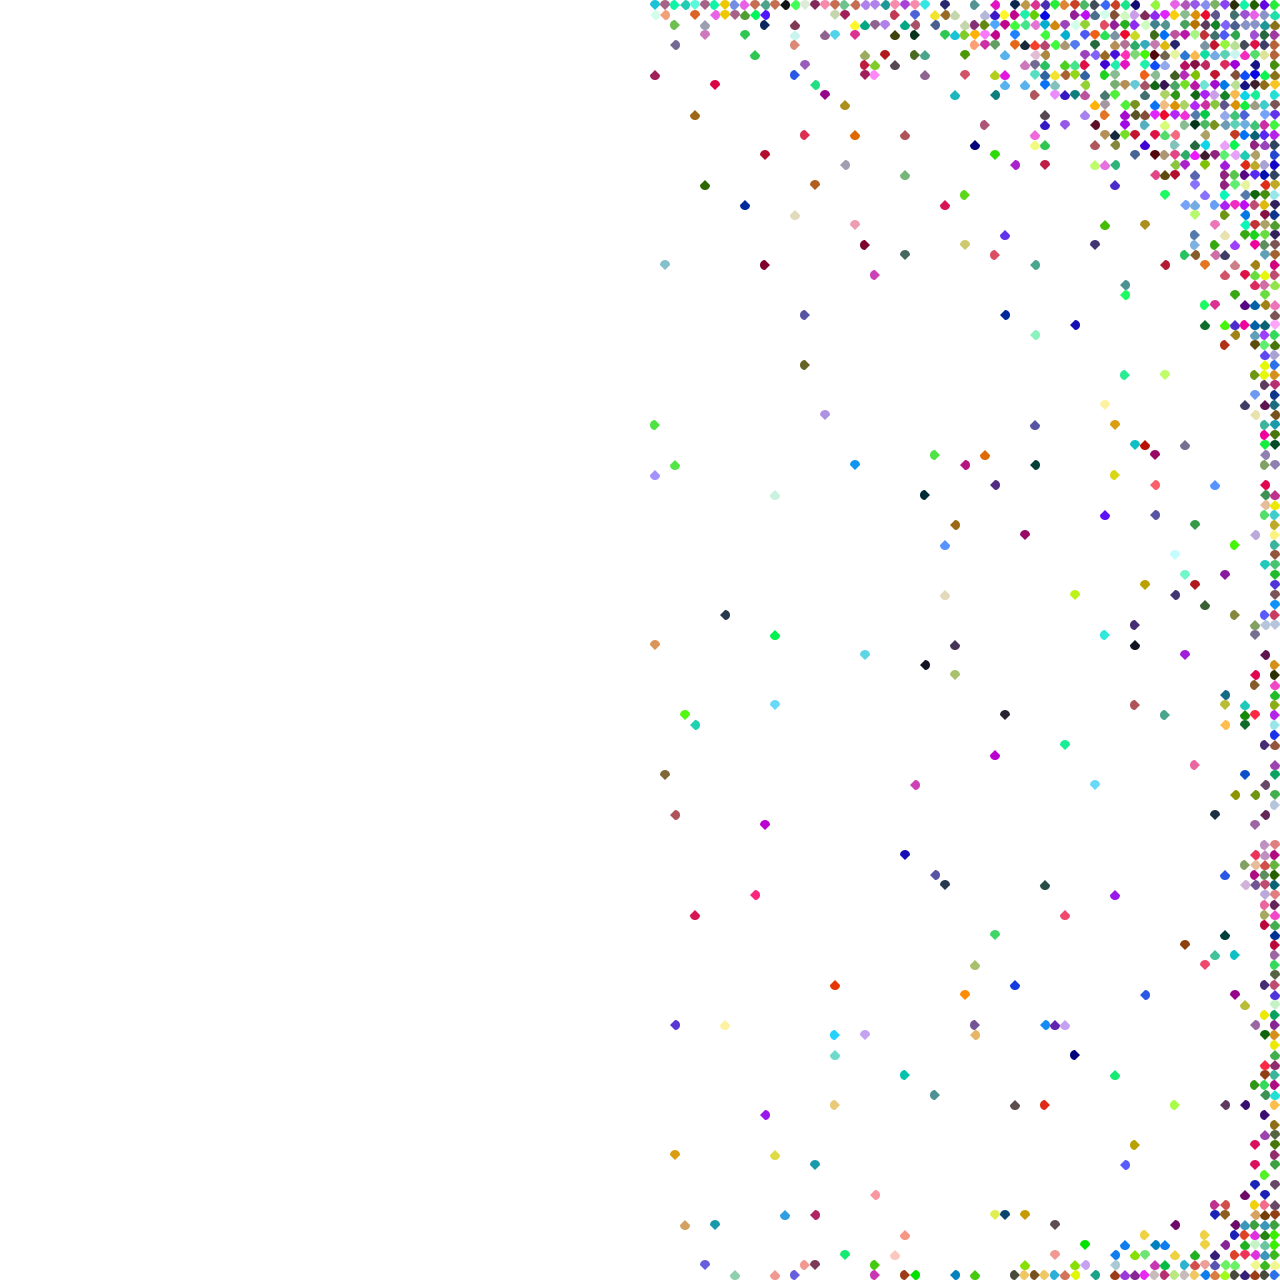

Evolution.NoPossible     : 875462
Evolution.MoveRandom     : 741256
Evolution.MoveForward    : 513948
Evolution.MoveLeftOrRight: 453432
Evolution.MoveBack       : 391769
Evolution.MoveLeftRight  : 381759
Evolution.MoveNorthSouth : 285010
Evolution.MoveEastWest   : 232416
Evolution.NullOutput     : 124948

In [12]:
Reproduce();
RunEpoch();

Start 1000->946, 94%



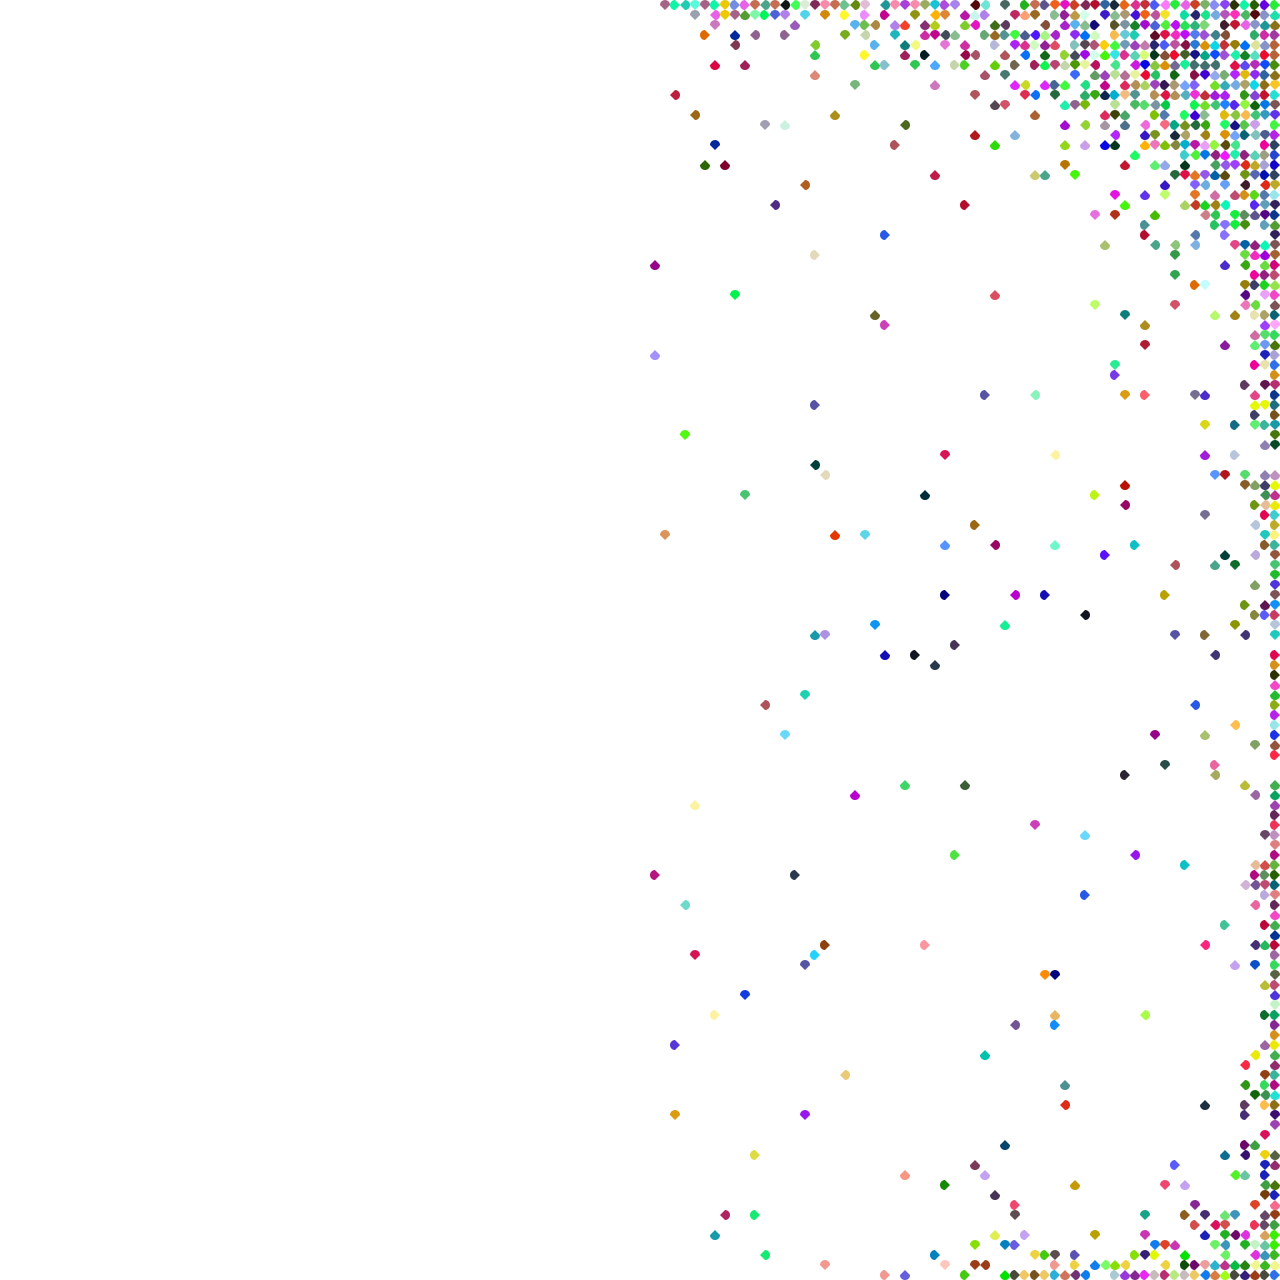

Evolution.NoPossible     : 1200667
Evolution.MoveRandom     : 924723
Evolution.MoveForward    : 618615
Evolution.MoveLeftOrRight: 549453
Evolution.MoveBack       : 468135
Evolution.MoveLeftRight  : 463084
Evolution.MoveNorthSouth : 338559
Evolution.MoveEastWest   : 280385
Evolution.NullOutput     : 156379

In [13]:
Reproduce();
RunEpoch();

Start 1000->959, 95%



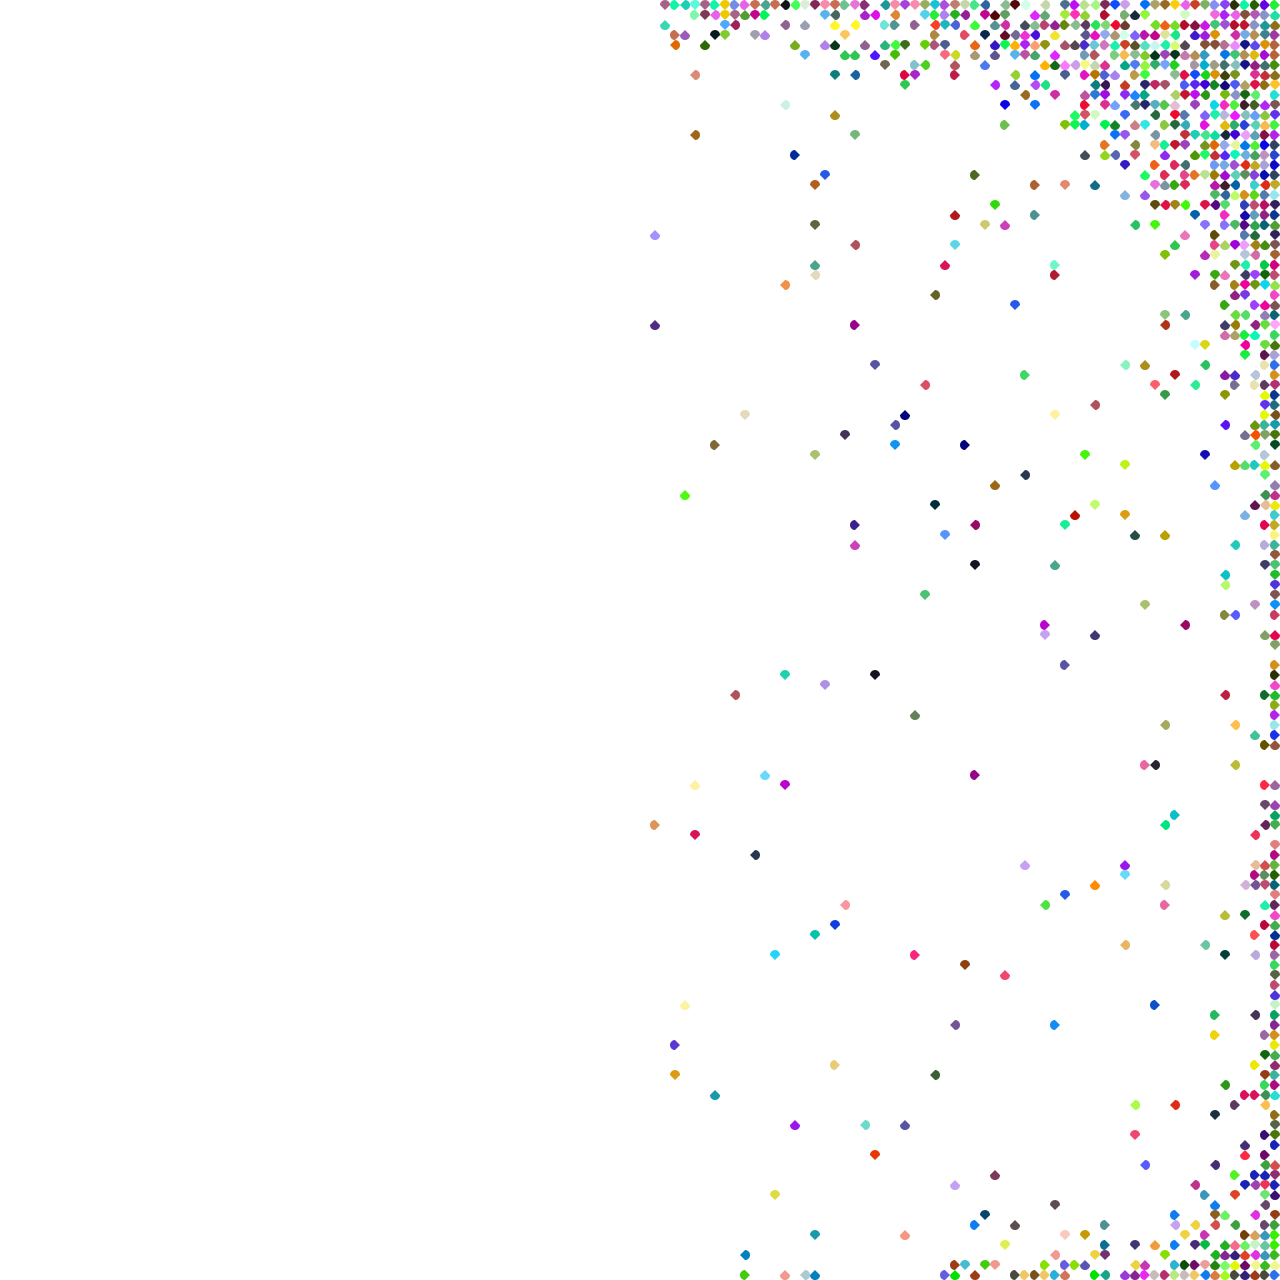

Evolution.NoPossible     : 1537539
Evolution.MoveRandom     : 1100478
Evolution.MoveForward    : 723423
Evolution.MoveLeftOrRight: 644092
Evolution.MoveLeftRight  : 544859
Evolution.MoveBack       : 537184
Evolution.MoveNorthSouth : 394649
Evolution.MoveEastWest   : 328619
Evolution.NullOutput     : 189157

In [14]:
Reproduce();
RunEpoch();

In [15]:
ShowCreature(eco.Creatures[9]);

digraph {
      node [fontname=helvetica]
      edge [fontname=helvetica]
    
  { BlockB [tooltip="1 if Back blocked, else 0"] } -> { MoveNS [color="0.129 0.8 0.5"] [penwidth=0.047] [tooltip="Move South if value>0, else North"] }[color=blue] [penwidth=6.864] [headlabel="   2.9   "] [arrowhead=empty]
  { BlockL [tooltip="1 if Left blocked, else 0"] } -> { MoveRND [color="0.840 0.8 0.5"] [penwidth=0.047] [tooltip="Move randomly, irrespective of value"] }[color=red] [penwidth=4.666] [headlabel="   -1.4   "] [arrowhead=empty]
  { N1  } -> { MoveF [color="0.160 0.8 0.5"] [penwidth=1.532] [tooltip="Move Forward (binary)"] }[color=blue] [penwidth=6.605] [headlabel="   2.7   "] [arrowhead=empty]
  { Const  } -> { N1 [color=green] [penwidth=0.000]  }[color=blue] [penwidth=5.524] [headlabel="   1.9   "] [arrowhead=empty]
  { Yin [tooltip="-1=top, +1=bottom, 0=center"] } -> { MoveB [color="0.160 0.8 0.5"] [penwidth=1.374] [tooltip="Move Back (binary)"] }[color=blue] [penwidth=5.984] [headlabel="